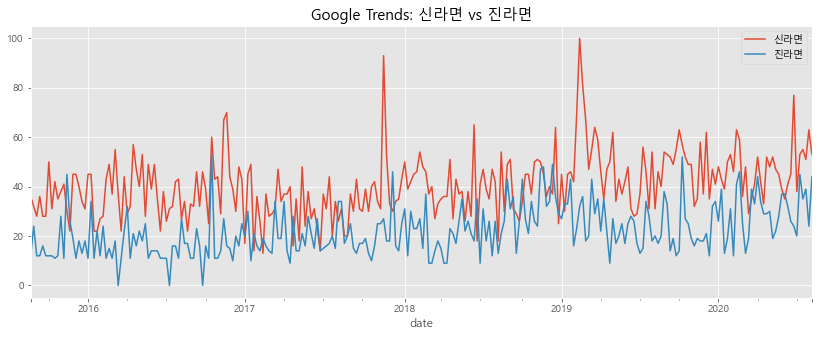

In [5]:
from pytrends.request import TrendReq
import matplotlib.pyplot as plt
import pandas as pd
import os

# 검색 keyword, 검색지역, 검색기간 입력
keyword1 = '신라면'
keyword2 = '진라면'
local_area = 'KR'
period = 'today 5-y'

# Google Trend 접속 및 데이터 탑재
trend_obj = TrendReq()
trend_obj.build_payload(kw_list=[keyword1, keyword2], timeframe=period, geo = local_area)
# 시간에 따른 검색 트렌드 변화를 보여주는 interest_over_time() 메소드를 이용
trend_df = trend_obj.interest_over_time()

# matplotlib 한글 폰트 오류 문제 해결
from matplotlib import font_manager, rc
cwd = os.getcwd()
font_path = os.path.join(cwd, 'C:\Windows\Fonts', 'malgun.ttf') # 폰트파일 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# 그래프 출력
plt.style.use('ggplot')
plt.figure(figsize=(14,5))
trend_df[keyword1].plot()
trend_df[keyword2].plot()
plt.title('Google Trends: %s vs %s' % (keyword1, keyword2), size = 15)
plt.legend(loc='best')

# 그래프 파일 저장
cwd = os.getcwd()
output_path = os.path.join(cwd, 'output', 'google_trend_%s__%s_vs_%s.png' % (local_area, keyword1, keyword2))
plt.savefig(output_path, dpi=300)
plt.show()